# Explorative Analyse

Zunächst wird der originale Train-Datensatz explorativ analysiert und gegebenenfalls mit dem Test-Datensatz verglichen.

In [41]:
! pip install wordcloud
! pip install mlxtend
! pip install nltk



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import numpy as np
import pandas as pd 
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from PIL import Image
from sklearn.utils import resample
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve

import tensorflow as tf
from sklearn.metrics import roc_auc_score, roc_curve,auc
from keras import regularizers
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,f1_score,classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from itertools import cycle

lemma = WordNetLemmatizer()
stopword = set(STOPWORDS)
nltk.download('omw-1.4')
%matplotlib inline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')


from nltk.corpus import brown
nltk.download("brown")
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [43]:
train_data = pd.read_csv("..\\..\\..\\data\\twitter_hate-speech\\train.csv")
test_data = pd.read_csv("..\\..\\..\\data\\twitter_hate-speech\\test.csv")
train_cleaned_data = pd.read_csv("..\\..\\..\\data\\twitter_hate-speech\\train_cleaned.csv")
test_cleaned_data = pd.read_csv("..\\..\\..\\data\\twitter_hate-speech\\test_cleaned.csv")


In [44]:
train_cleaned_data.sample(5)

,id,label,tweet,tweet_cleaned,user_handle,hashtags,emojis
23317,26698,1,nothing humorous about your jibes u #arrogant ...,nothing trump official paladino fire crude oba...,0,['#arrogant'],NaN
218,225,0,@user stone roses done. now time for @user in...,stone rose time club,2,[],NaN
5142,5515,0,"cross check day passed! next week, on to resp...",cross check pass next week response drive onco...,0,[],":oncoming_police_car:,:police_car_light:"
10377,11421,0,13 days!!! #love #life #reunited #countdown,life reunite countdown,0,"['#love', '#life', '#reunited', '#countdown']",NaN
3611,3849,0,@user is two phase #ohodontic treatment right...,two phase treatment right child tooth brace h,1,"['#ohodontic', '#teeth', '#smile', '#braces', ...",NaN


### Hate-Speech vs kein Hate-Speech

In [45]:
import matplotlib.pyplot as plt

# Klassenverteilung in den ursprünglichen Trainingsdaten
train_label_counts = train_data['label'].value_counts()
print("Class Distribution in Original Train Data:")
print(train_label_counts)

# Klassenverteilung in den bereinigten Trainingsdaten
train_cleaned_label_counts = train_cleaned_data['label'].value_counts()
print("\nClass Distribution in Cleaned Train Data:")
print(train_cleaned_label_counts)




Class Distribution in Original Train Data:
label
0    29720
1     2242
Name: count, dtype: int64

Class Distribution in Cleaned Train Data:
label
0    25839
1     1811
Name: count, dtype: int64


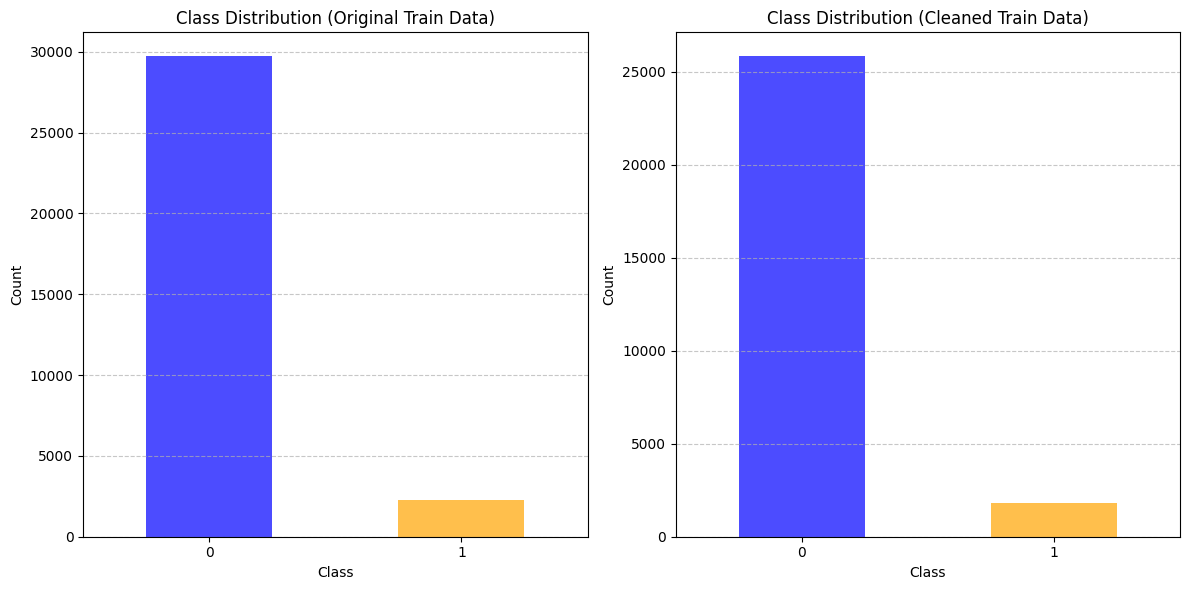

In [46]:
# Visualisierung der Klassenverteilung
plt.figure(figsize=(12, 6))

# Originale Daten
plt.subplot(1, 2, 1)
train_label_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Class Distribution (Original Train Data)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Bereinigte Daten
plt.subplot(1, 2, 2)
train_cleaned_label_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title('Class Distribution (Cleaned Train Data)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Train Data Length Vs Test Data Length

In [47]:
# Berechnung der Länge der Tweets
train_data_len = train_data['tweet'].str.len()
test_data_len = test_data['tweet'].str.len()

train_cleaned_data_len = train_cleaned_data['tweet_cleaned'].str.len()
test_cleaned_data_len = test_cleaned_data['tweet_cleaned'].str.len()

# Statistiken für Trainingsdaten
print("Train Data Length Statistics:")
print(f"Mean Length: {train_data_len.mean():.2f}")
print(f"Median Length: {train_data_len.median():.2f}")
print(f"Minimum Length: {train_data_len.min()}")
print(f"Maximum Length: {train_data_len.max()}")
print(f"Standard Deviation: {train_data_len.std():.2f}\n")

# Statistiken für Testdaten
print("Test Data Length Statistics:")
print(f"Mean Length: {test_data_len.mean():.2f}")
print(f"Median Length: {test_data_len.median():.2f}")
print(f"Minimum Length: {test_data_len.min()}")
print(f"Maximum Length: {test_data_len.max()}")
print(f"Standard Deviation: {test_data_len.std():.2f} \n")

# Statistiken für bereinigten Trainingsdaten
print("Cleaned Train Data Length Statistics:")
print(f"Mean Length: {train_cleaned_data_len.mean():.2f}")
print(f"Median Length: {train_cleaned_data_len.median():.2f}")
print(f"Minimum Length: {train_cleaned_data_len.min()}")
print(f"Maximum Length: {train_cleaned_data_len.max()}")
print(f"Standard Deviation: {train_cleaned_data_len.std():.2f}\n")

# Statistiken für bereinigten Testdaten
print("Cleaned Train Data Length Statistics:")
print(f"Mean Length: {test_cleaned_data_len.mean():.2f}")
print(f"Median Length: {test_cleaned_data_len.median():.2f}")
print(f"Minimum Length: {test_cleaned_data_len.min()}")
print(f"Maximum Length: {test_cleaned_data_len.max()}")
print(f"Standard Deviation: {test_cleaned_data_len.std():.2f}\n")


Train Data Length Statistics:
Mean Length: 84.74
Median Length: 88.00
Minimum Length: 11
Maximum Length: 274
Standard Deviation: 29.46

Test Data Length Statistics:
Mean Length: 84.55
Median Length: 88.00
Minimum Length: 11
Maximum Length: 292
Standard Deviation: 29.61 

Cleaned Train Data Length Statistics:
Mean Length: 44.25
Median Length: 42.00
Minimum Length: 1.0
Maximum Length: 515.0
Standard Deviation: 23.77

Cleaned Train Data Length Statistics:
Mean Length: 42.47
Median Length: 40.00
Minimum Length: 1.0
Maximum Length: 532.0
Standard Deviation: 23.86



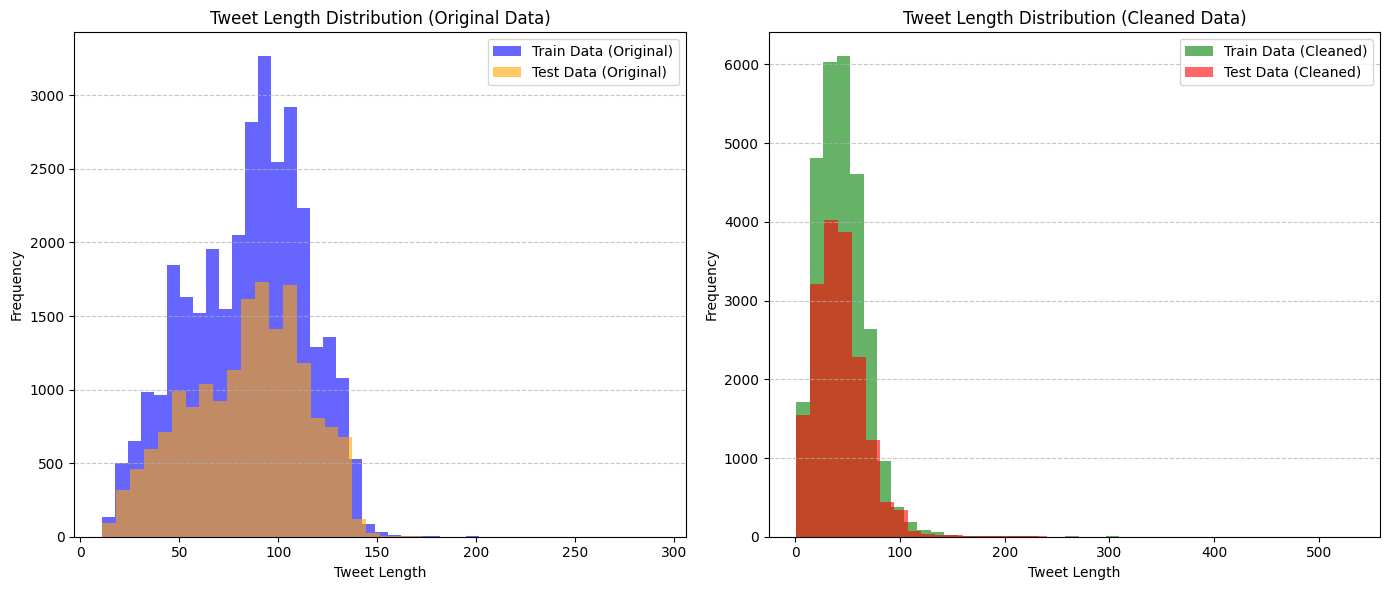

In [48]:
# Erstellung der Subplots
plt.figure(figsize=(14, 6))

# Subplot 1: Originaldaten
plt.subplot(1, 2, 1)
plt.hist(train_data_len, bins=40, alpha=0.6, label='Train Data (Original)', color='blue')
plt.hist(test_data_len, bins=40, alpha=0.6, label='Test Data (Original)', color='orange')
plt.title('Tweet Length Distribution (Original Data)')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Bereinigte Daten
plt.subplot(1, 2, 2)
plt.hist(train_cleaned_data_len, bins=40, alpha=0.6, label='Train Data (Cleaned)', color='green')
plt.hist(test_cleaned_data_len, bins=40, alpha=0.6, label='Test Data (Cleaned)', color='red')
plt.title('Tweet Length Distribution (Cleaned Data)')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Layout-Anpassung und Anzeige
plt.tight_layout()
plt.show()


Verteilung: Meiste Tweets zwischen 50-100 Zeichen.
Trainingsdaten vs. Testdaten: Trainingsdaten haben mehr längere Tweets.
Die Verteilung der Tweet-Längen zeigt eine Abnahme ab 100 Zeichen, was vermutlich mit der früheren Zeichenbegrenzung von Twitter zusammenhängt. Bis 2019 waren Tweets auf 140 Zeichen begrenzt. Da der Datensatz vermutlich vor 2019 erhoben wurde, spiegelt sich diese Begrenzung in der Verteilung wider.

### Wordcloud - Häufige Wörter (Train data)

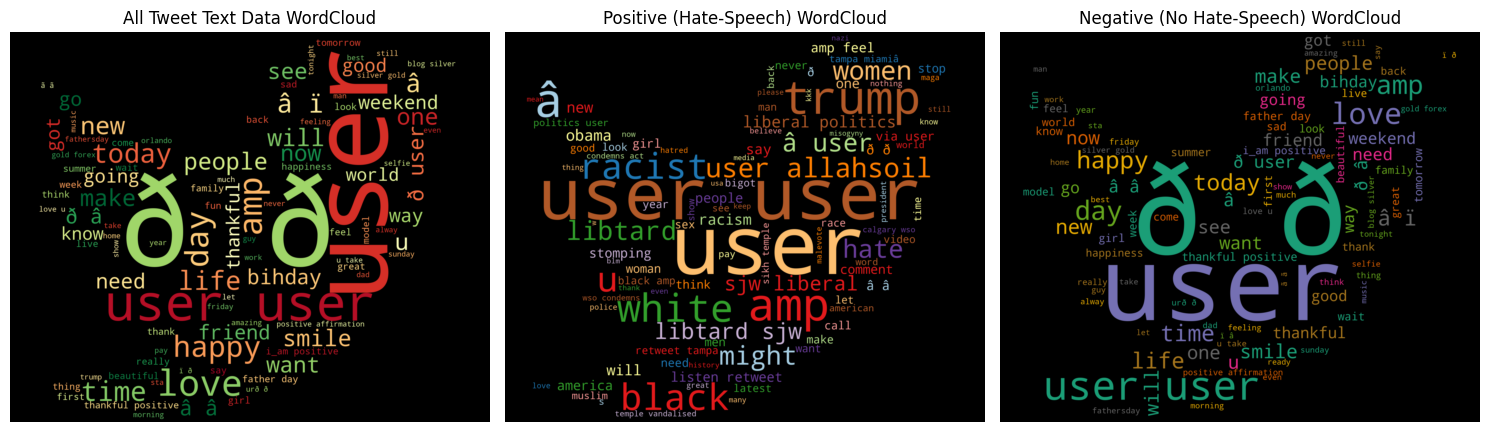

In [49]:
# Vorbereitung der Daten
wordcloud_mask = np.array(Image.open("twitter.png"))

# All Tweet Text Data WordCloud
all_tweet_text = " ".join(train_data["tweet"].tolist())

# Positive (Hate-Speech) Tweet Text Data WordCloud
racist_sexist_data = train_data[train_data.label == 1]
racist_tweet_text = " ".join(racist_sexist_data["tweet"].tolist())

# Negative (No Hate-Speech) Tweet Text Data WordCloud
negative_data = train_data[train_data.label == 0]
negative_tweet_text = " ".join(negative_data["tweet"].tolist())

plt.figure(figsize=(15, 10))

# Subplot 1: All Tweet Text Data WordCloud
plt.subplot(1, 3, 1)
wordcloud = WordCloud(stopwords=stopword, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(all_tweet_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("All Tweet Text Data WordCloud")

# Subplot 2: Positive (Hate-Speech) WordCloud
plt.subplot(1, 3, 2)
wordcloud = WordCloud(stopwords=stopword, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Paired').generate(racist_tweet_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive (Hate-Speech) WordCloud")

# Subplot 3: Negative (No Hate-Speech) WordCloud
plt.subplot(1, 3, 3)
wordcloud = WordCloud(stopwords=stopword, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Dark2').generate(negative_tweet_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative (No Hate-Speech) WordCloud")

# Optimierung des Layouts und Anzeige
plt.tight_layout()
plt.show()


Häufige Wörter (Alle Labels): "user," "day," "love," "life," "happy" – viele positive oder neutrale Themen.
Sonderzeichen: "ð," "â," "amp" – möglicherweise Kodierungsfehler, die bereinigt werden sollten.
Gefühle: Überwiegend positive Begriffe, was auf viele nicht-hassbezogene Tweets hindeutet.
Stoppwörter: Einige Stoppwörter wie "today" und "now" sind noch vorhanden.
Hassrede: Keine auffälligen Hassrede-Begriffe, mehr Fokus auf Alltagssprache aber wahrscheinlich wegen der Ungleichgewicht der Daten beider Klassen

Häufigste Wörter (Label 1): "user," "trump," "racist," "white," "libtard."
Politische Begriffe: Wörter wie "trump," "liberal," "sjw" deuten auf politische Themen hin.
Hassrede: Worte wie "racist," "hate," "women," "black" weisen auf rassistische und sexistische Inhalte hin.
Abwertende Sprache: Begriffe wie "libtard," "sjw" und "bigot" werden oft in abfälligem Kontext verwendet.

Häufigste Wörter (Label 0): "user," "day," "happy," "love," "life."
Positiver Ton: Begriffe wie "happy," "love," "thankful," "smile" zeigen positive Themen.
Alltagsthemen: Wörter wie "family," "weekend," "today," "friend" deuten auf alltägliche und persönliche Inhalte hin.

### Wordcloud - Häufige Wörter (Cleaned Train data)

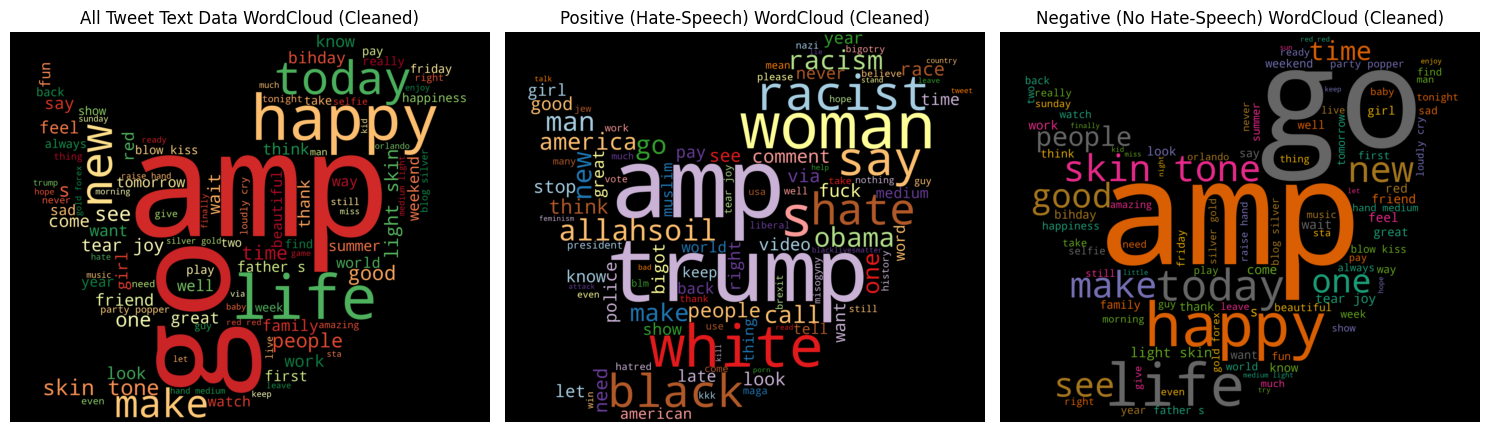

In [51]:
wordcloud_mask = np.array(Image.open("twitter.png"))

# All Tweet Text Data WordCloud (Cleaned)
train_cleaned_data['tweet_cleaned'] = train_cleaned_data['tweet_cleaned'].fillna("")

all_cleaned_tweet_text = " ".join(train_cleaned_data["tweet_cleaned"].tolist())

# Positive (Hate-Speech) Tweet Text Data WordCloud (Cleaned)
racist_sexist_cleaned_data = train_cleaned_data[train_cleaned_data.label == 1]
racist_cleaned_tweet_text = " ".join(racist_sexist_cleaned_data["tweet_cleaned"].tolist())

# Negative (No Hate-Speech) Tweet Text Data WordCloud (Cleaned)
negative_cleaned_data = train_cleaned_data[train_cleaned_data.label == 0]
negative_cleaned_tweet_text = " ".join(negative_cleaned_data["tweet_cleaned"].tolist())

plt.figure(figsize=(15, 10))

# Subplot 1: All Tweet Text Data WordCloud (Cleaned)
plt.subplot(1, 3, 1)
wordcloud = WordCloud(stopwords=stopword, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='RdYlGn').generate(all_cleaned_tweet_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("All Tweet Text Data WordCloud (Cleaned)")

# Subplot 2: Positive (Hate-Speech) WordCloud (Cleaned)
plt.subplot(1, 3, 2)
wordcloud = WordCloud(stopwords=stopword, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Paired').generate(racist_cleaned_tweet_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive (Hate-Speech) WordCloud (Cleaned)")

# Subplot 3: Negative (No Hate-Speech) WordCloud (Cleaned)
plt.subplot(1, 3, 3)
wordcloud = WordCloud(stopwords=stopword, width=800, height=480, max_words=100, mask=wordcloud_mask, colormap='Dark2').generate(negative_cleaned_tweet_text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative (No Hate-Speech) WordCloud (Cleaned)")

# Optimierung des Layouts und Anzeige
plt.tight_layout()
plt.show()


### Most Frequent Words In Train Data

Top 10 Most Frequent Words in Cleaned Train Data:
   Words  Most_Frequent_Words
0    get                 1685
1  happy                 1597
2     go                 1479
3    amp                 1437
4   good                 1201
5   hand                 1182
6   make                 1114
7   life                 1111
8    see                 1046
9  today                 1042 



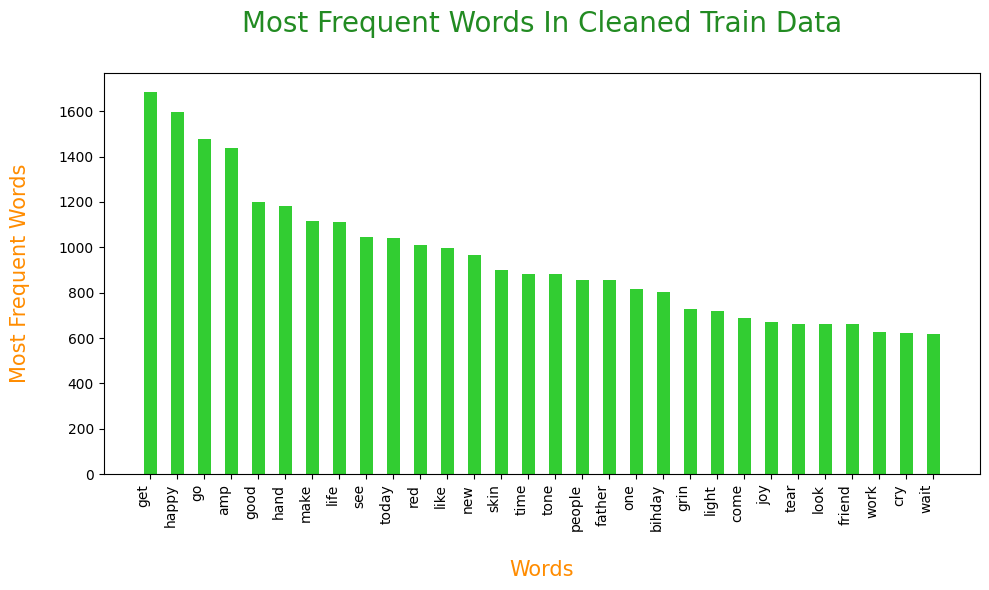

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer ohne zusätzliche Stopword-Entfernung, da Daten bereits bereinigt
count_vectorizer = CountVectorizer()
word = count_vectorizer.fit_transform(train_cleaned_data["tweet_cleaned"])

sum_words = word.sum(axis=0)

most_freq_words = [(all_word, sum_words[0, i]) for all_word, i in count_vectorizer.vocabulary_.items()]
most_freq_words = sorted(most_freq_words, key=lambda x: x[1], reverse=True)

frequent_words = pd.DataFrame(most_freq_words, columns=["Words", "Most_Frequent_Words"])

# Print der Top 10 Wörter
print("Top 10 Most Frequent Words in Cleaned Train Data:")
print(frequent_words.head(10), "\n")

# Visualisierung der Top 30 häufigsten Wörter
word_list = list(frequent_words.head(30)["Words"])
word_value_list = list(frequent_words.head(30)["Most_Frequent_Words"])

plt.figure(figsize=(10, 6))
plt.bar(word_list, word_value_list, color="limegreen", width=0.5)
plt.xlabel("\nWords", fontsize=15, color="darkorange")
plt.ylabel("Most Frequent Words\n", fontsize=15, color="darkorange")
plt.title("Most Frequent Words In Cleaned Train Data\n", fontsize=20, color="forestgreen")
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()


### Most Common Hate-speech Words With Hashtag


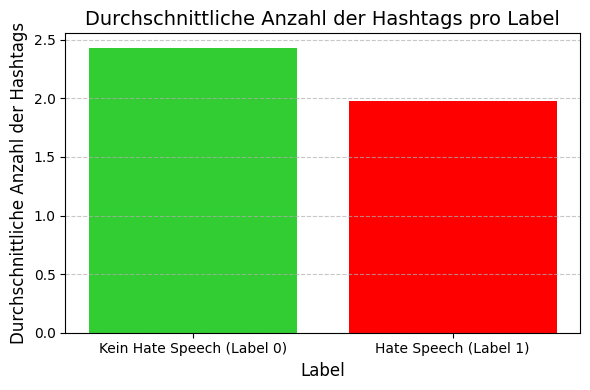

Durchschnittliche Anzahl der Hashtags in 'Kein Hate Speech' Tweets: 2.43
Durchschnittliche Anzahl der Hashtags in 'Hate Speech' Tweets: 1.98


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Gruppieren der Daten basierend auf dem Label und Berechnung der durchschnittlichen Anzahl der Hashtags
avg_hashtags = train_cleaned_data.groupby('label')['num_hashtags'].mean()

# Erstellen eines Barplots
plt.figure(figsize=(6, 4))
plt.bar(['Kein Hate Speech (Label 0)', 'Hate Speech (Label 1)'], avg_hashtags, color=['limegreen', 'red'])
plt.title('Durchschnittliche Anzahl der Hashtags pro Label', fontsize=14)
plt.ylabel('Durchschnittliche Anzahl der Hashtags', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Anzeige des Ergebnisses
plt.tight_layout()
plt.show()

# Ausgabe der genauen Werte zur Unterstützung der Analyse
print(f"Durchschnittliche Anzahl der Hashtags in 'Kein Hate Speech' Tweets: {avg_hashtags[0]:.2f}")
print(f"Durchschnittliche Anzahl der Hashtags in 'Hate Speech' Tweets: {avg_hashtags[1]:.2f}")


Top 5 Hashtags in No Hate-Speech Tweets:
     words  frequency
0      NaN       7317
1    #love       1406
2   #smile        551
3     #fun        437
4    #life        406
5  #summer        366 

Top 5 Hashtags in Hate-Speech Tweets:
        words  frequency
0         NaN        553
1      #trump        106
2  #allahsoil         74
3       #hate         30
4      #bigot         26
5       #maga         23 



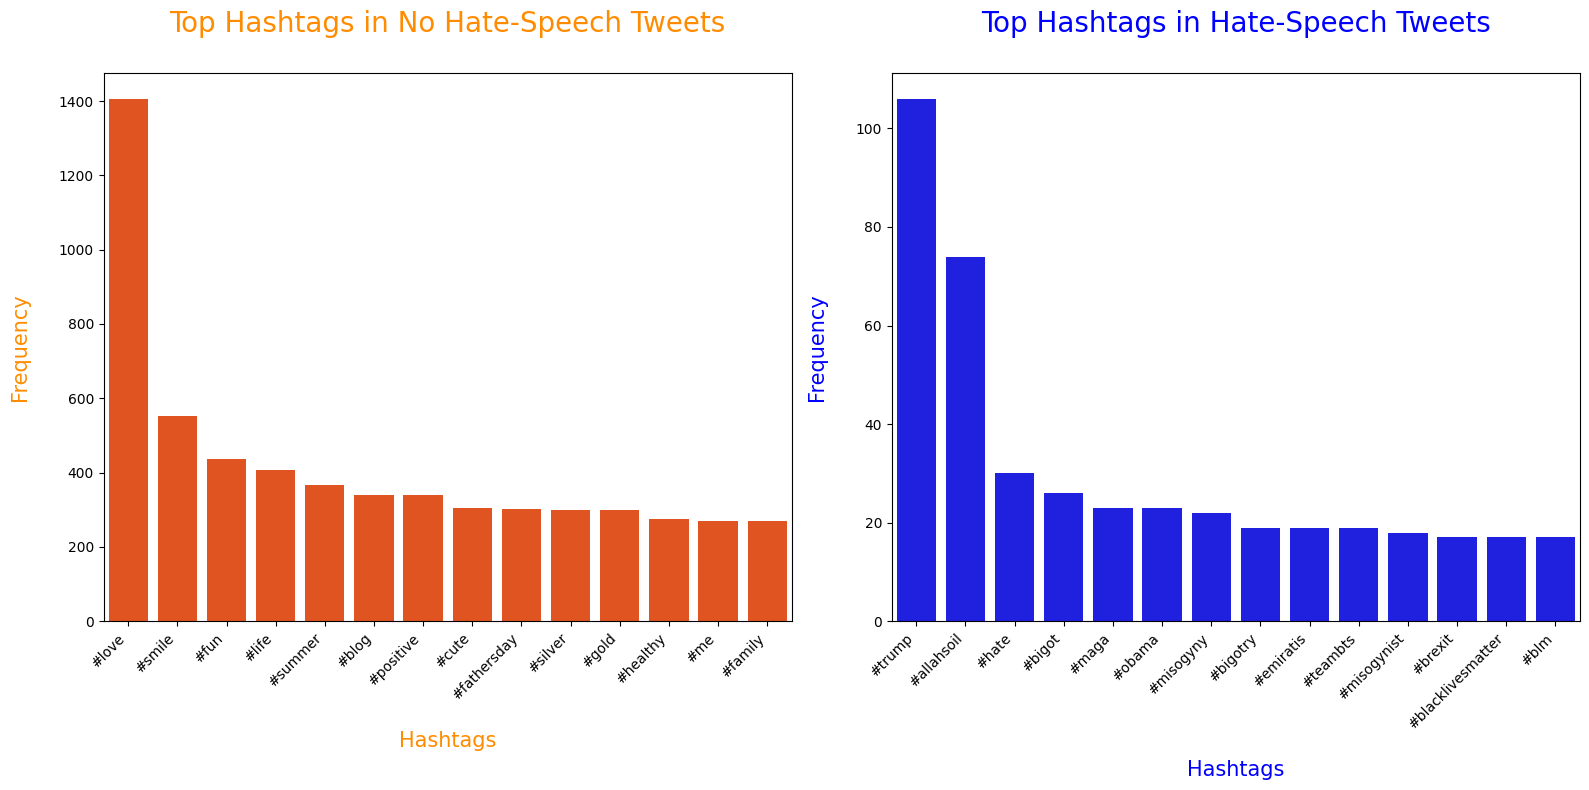

In [ ]:
hashtags_no_hate = train_cleaned_data[train_cleaned_data['label'] == 0]['hashtags'].dropna().apply(lambda x: eval(x)).explode()
hashtags_hate = train_cleaned_data[train_cleaned_data['label'] == 1]['hashtags'].dropna().apply(lambda x: eval(x)).explode()

# Häufigkeitsverteilung für No Hate-Speech Hashtags
negative_hashtag = FreqDist(hashtags_no_hate).most_common(15)
negative_data = pd.DataFrame(negative_hashtag, columns=['words', 'frequency'])

# Häufigkeitsverteilung für Hate-Speech Hashtags
positive_hashtag = FreqDist(hashtags_hate).most_common(15)
positive_data = pd.DataFrame(positive_hashtag, columns=['words', 'frequency'])

print("Top 5 Hashtags in No Hate-Speech Tweets:")
print(negative_data.head(6), "\n")
print("Top 5 Hashtags in Hate-Speech Tweets:")
print(positive_data.head(6), "\n")

plt.figure(figsize=(16, 8))

# Subplot 1: No Hate-Speech Hashtags
plt.subplot(1, 2, 1)
sns.barplot(x='words', y='frequency', data=negative_data, color="orangered")
plt.title('Top Hashtags in No Hate-Speech Tweets\n', fontsize=20, color="darkorange")
plt.xlabel("\nHashtags", fontsize=15, color="darkorange")
plt.ylabel("Frequency\n", fontsize=15, color="darkorange")
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=2)

# Subplot 2: Hate-Speech Hashtags
plt.subplot(1, 2, 2)
sns.barplot(x='words', y='frequency', data=positive_data, color="blue")
plt.title('Top Hashtags in Hate-Speech Tweets\n', fontsize=20, color="blue")
plt.xlabel("\nHashtags", fontsize=15, color="blue")
plt.ylabel("Frequency\n", fontsize=15, color="blue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Number of hashtags and mentions

In [ ]:
# Berechnung der Anzahl von Mentions und Hashtags pro Tweet
train_cleaned_data['num_mentions'] = train_cleaned_data['tweet'].apply(lambda x: x.count('@'))
train_cleaned_data['num_hashtags'] = train_cleaned_data['tweet'].apply(lambda x: x.count('#'))

mentions_stats = {
    "Mean Mentions": train_cleaned_data['num_mentions'].mean(),
    "Median Mentions": train_cleaned_data['num_mentions'].median(),
    "Max Mentions": train_cleaned_data['num_mentions'].max(),
    "Min Mentions": train_cleaned_data['num_mentions'].min(),
    "Total Mentions": train_cleaned_data['num_mentions'].sum()
}

hashtags_stats = {
    "Mean Hashtags": train_cleaned_data['num_hashtags'].mean(),
    "Median Hashtags": train_cleaned_data['num_hashtags'].median(),
    "Max Hashtags": train_cleaned_data['num_hashtags'].max(),
    "Min Hashtags": train_cleaned_data['num_hashtags'].min(),
    "Total Hashtags": train_cleaned_data['num_hashtags'].sum()
}

print("Statistics for Mentions (@):")
for key, value in mentions_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")

print("\nStatistics for Hashtags (#):")
for key, value in hashtags_stats.items():
    print(f"{key}: {value:.2f}" if isinstance(value, float) else f"{key}: {value}")



Statistics for Mentions (@):
Mean Mentions: 0.59
Median Mentions: 0.00
Max Mentions: 10
Min Mentions: 0
Total Mentions: 16250

Statistics for Hashtags (#):
Mean Hashtags: 2.40
Median Hashtags: 2.00
Max Hashtags: 20
Min Hashtags: 0
Total Hashtags: 66436


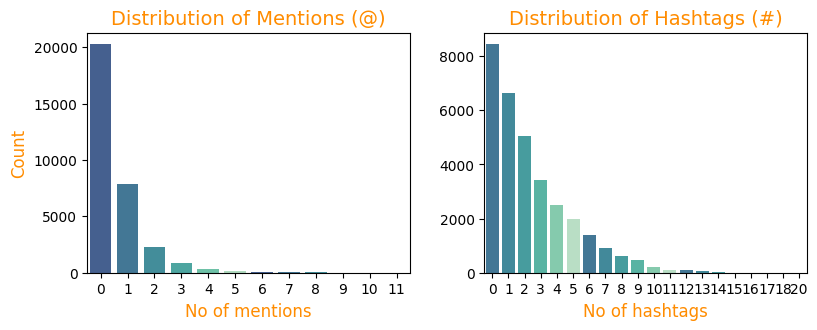

In [ ]:
plt.figure(figsize=(9, 3))

# Erster Subplot: Verteilung der Mentions (@)
plt.subplot(1, 2, 1)
sns.countplot(x='num_mentions', data=train_data, palette=sns.color_palette("mako", n_colors=9)[3:])
plt.xlabel('No of mentions', fontsize=12, color='darkorange')
plt.ylabel('Count', fontsize=12, color='darkorange')
plt.title('Distribution of Mentions (@)', fontsize=14, color='darkorange')

# Zweiter Subplot: Verteilung der Hashtags (#)
plt.subplot(1, 2, 2)
sns.countplot(x='num_hashtags', data=train_data, palette=sns.color_palette("mako", n_colors=11)[5:])
plt.xlabel('No of hashtags', fontsize=12, color='darkorange')
plt.ylabel('')
plt.title('Distribution of Hashtags (#)', fontsize=14, color='darkorange')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.23, hspace=0.3)

plt.show()

Wichtigste Erkenntnisse:
- Höchster Prozentsatz von nicht rassistischen/sexistischen Tweets bei Mention-Zahl: 100.0 bei Mention-Zahl 8
- Höchster Prozentsatz von rassistischen/sexistischen Tweets bei Mention-Zahl: 12.979351032448378 bei Mention-Zahl 4


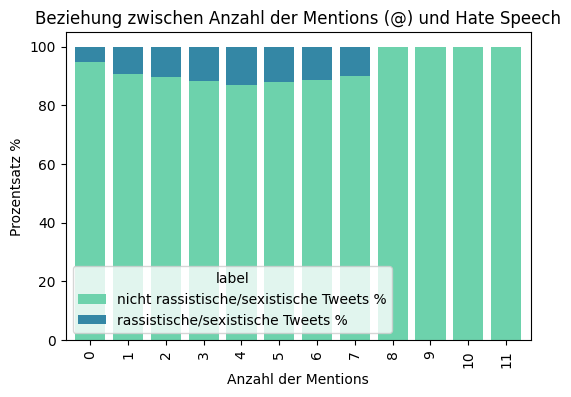

In [ ]:
# Kreuztabelle erstellen
mention_label_cross = pd.crosstab(train_data['num_mentions'], train_data['label'])

# Berechnung der Summe aller Tweets je nach Anzahl der Mentions
mention_label_cross['sum'] = mention_label_cross[0] + mention_label_cross[1]

mention_label_cross['nicht rassistische/sexistische Tweets %'] = (mention_label_cross[0] / mention_label_cross['sum']) * 100

mention_label_cross['rassistische/sexistische Tweets %'] = (mention_label_cross[1] / mention_label_cross['sum']) * 100

mention_label_cross_percentage = mention_label_cross.drop([0, 1, 'sum'], axis=1)

print("Wichtigste Erkenntnisse:")
print("- Höchster Prozentsatz von nicht rassistischen/sexistischen Tweets bei Mention-Zahl:",
      mention_label_cross['nicht rassistische/sexistische Tweets %'].max(), 
      "bei Mention-Zahl", mention_label_cross['nicht rassistische/sexistische Tweets %'].idxmax())
print("- Höchster Prozentsatz von rassistischen/sexistischen Tweets bei Mention-Zahl:",
      mention_label_cross['rassistische/sexistische Tweets %'].max(),
      "bei Mention-Zahl", mention_label_cross['rassistische/sexistische Tweets %'].idxmax())

mention_label_cross_percentage.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#6dd2ac', '#3487a5'], width=0.8)

plt.xlabel('Anzahl der Mentions')
plt.ylabel('Prozentsatz %')
plt.title('Beziehung zwischen Anzahl der Mentions (@) und Hate Speech')
plt.show()


#### Emoji-Analyse

Top 15 Emojis in Hate-Speech Tweets:
                                              emoji  frequency
0                                      :trade_mark:          6
1                                   :thinking_face:          5
2                                    :high_voltage:          4
3                                   :unamused_face:          3
4                          :globe_showing_Americas:          3
5                          :face_with_tears_of_joy:          3
6                          :face_with_rolling_eyes:          3
7                         :smiling_face_with_horns:          2
8                                      :down_arrow:          2
9                                       :red_heart:          2
10                                    :pile_of_poo:          2
11  :middle_finger:,:middle_finger:,:middle_finger:          2
12           :grinning_face_with_big_eyes:,:Cancer:          2
13                                     :weary_face:          1
14                

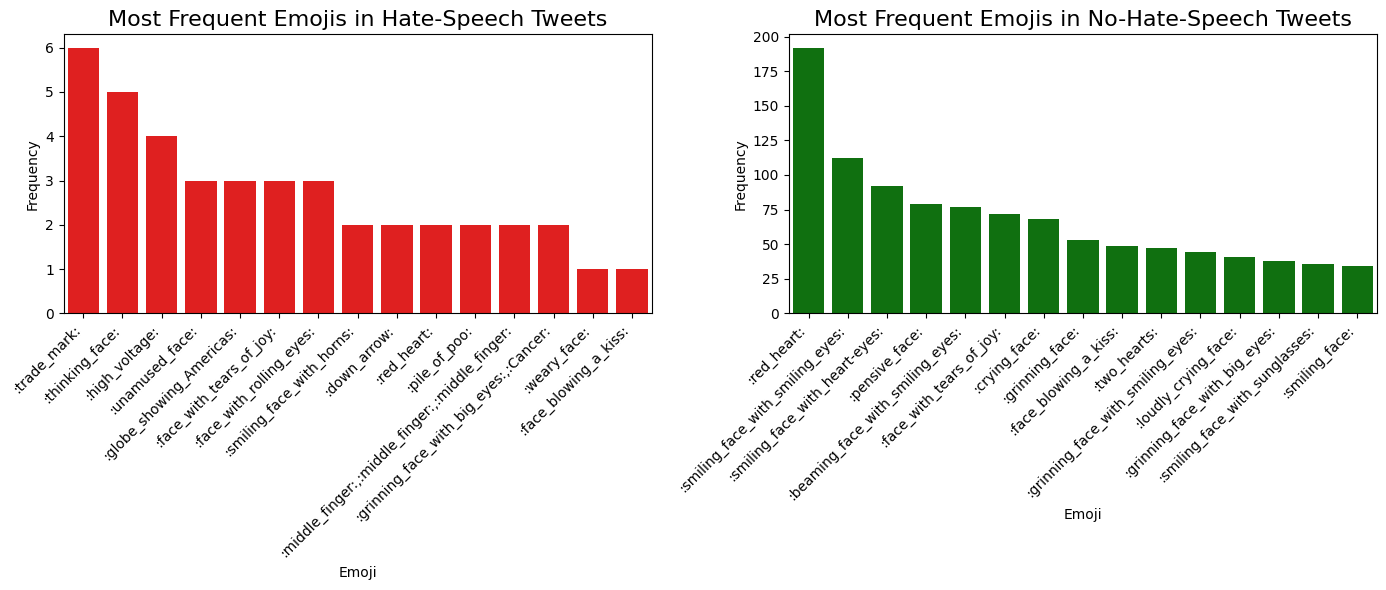

In [ ]:
train_cleaned_data['emojis'] = train_cleaned_data['emojis'].fillna("")

train_cleaned_data['emojis_split'] = train_cleaned_data['emojis'].apply(lambda x: [emoji.strip() for emoji in x.split(';') if emoji.strip()] if x else [])

hate_speech_emojis = train_cleaned_data[train_cleaned_data['label'] == 1]['emojis_split'].explode()
hate_speech_emojis = hate_speech_emojis[hate_speech_emojis != '[]']  # Entfernen von leeren Listen/Strings
hate_speech_emoji_freq = FreqDist(hate_speech_emojis).most_common(15)
hate_speech_emoji_df = pd.DataFrame(hate_speech_emoji_freq, columns=['emoji', 'frequency'])

no_hate_speech_emojis = train_cleaned_data[train_cleaned_data['label'] == 0]['emojis_split'].explode()
no_hate_speech_emojis = no_hate_speech_emojis[no_hate_speech_emojis != '[]']  # Entfernen von leeren Listen/Strings
no_hate_speech_emoji_freq = FreqDist(no_hate_speech_emojis).most_common(15)
no_hate_speech_emoji_df = pd.DataFrame(no_hate_speech_emoji_freq, columns=['emoji', 'frequency'])

print("Top 15 Emojis in Hate-Speech Tweets:")
print(hate_speech_emoji_df)

print("\nTop 15 Emojis in No-Hate-Speech Tweets:")
print(no_hate_speech_emoji_df)

# Visualisierung
plt.figure(figsize=(14, 6))

# Subplot 1: Hate-Speech Emojis
plt.subplot(1, 2, 1)
sns.barplot(x='emoji', y='frequency', data=hate_speech_emoji_df, color='red')
plt.title('Most Frequent Emojis in Hate-Speech Tweets', fontsize=16)
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")

# Subplot 2: No-Hate-Speech Emojis
plt.subplot(1, 2, 2)
sns.barplot(x='emoji', y='frequency', data=no_hate_speech_emoji_df, color='green')
plt.title('Most Frequent Emojis in No-Hate-Speech Tweets', fontsize=16)
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


Sentiment     negative  positive
Actual Label                    
0                 5400     24320
1                 1030      1212


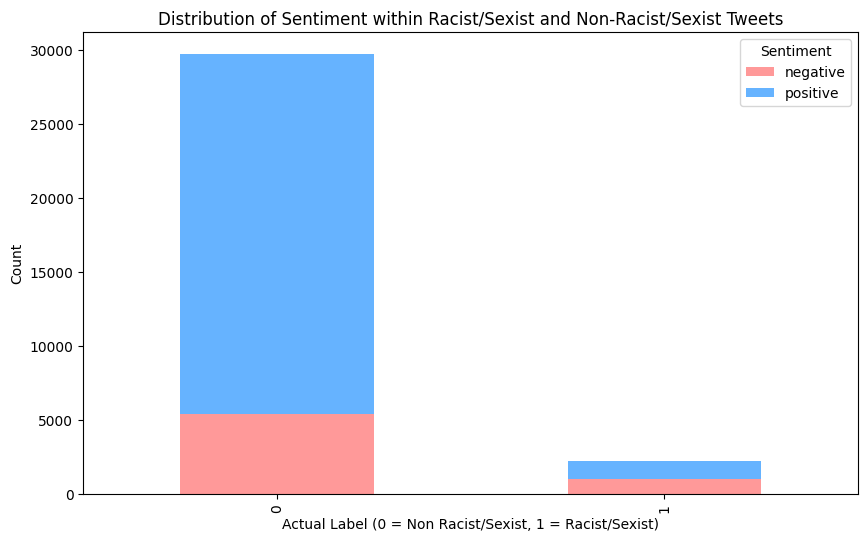

In [ ]:
# Crosstab zur Analyse der Verteilung von Sentiment in den beiden Klassen (rassistisch/sexistisch oder nicht)
sentiment_vs_label = pd.crosstab(train_data['label'], train_data['Sentiment_Label'], rownames=['Actual Label'], colnames=['Sentiment'])

print(sentiment_vs_label)

# Optional: Visualisierung der Verteilung
sentiment_vs_label.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Distribution of Sentiment within Racist/Sexist and Non-Racist/Sexist Tweets')
plt.xlabel('Actual Label (0 = Non Racist/Sexist, 1 = Racist/Sexist)')
plt.ylabel('Count')
plt.show()
